In [8]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table

In [9]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [10]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [11]:
survey  = 'gama'
version = 'v1' #'GAMA4'
dryrun = False

In [12]:
fpath = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
55383,587722982814646452,181.871878,-0.27042178,18.602032,0.04729,4,2dF296759,6,20.109747,18.963661,18.533672,18.344677,18.491995,147.14192120311714,35.83868211120554,G12,-140.4212474610433,-4.589256047031396,-0.6631120215621416,140.45410642461647,3.4096027430197253,-0.8039432388067882,0.42998886,18.602032,0.4691743462002878,0,3,-0.1368321267398545,-0.1760176118561579,0.05719678133943662,0.04292461406466658,0.4442610283587544,2.12,-0.045871302,-0.1002548,-17.24797588229584,-17.193592388335937,-17.293847184781306,35.85000759005951,35.79562409609961,-0.1526593314431797,-0.20228000393021722,0.06406554691902142,0.06289528578344605,-17.254844647875426,1.1979675,0.08183233858717384,0.0,-6.6020317,0.0022980267953874116,0.0
40488,587722982277644333,181.63329028,-0.64674069,18.588371,0.20122,4,G12_Y1_FS1_326,6,20.710634,19.534649,18.580471,18.089382,17.741833,695.92665243019,39.21281734659139,G12,-579.0775846562956,-16.511828107746332,-6.539420022552011,579.1890017775391,11.64718802028385,-7.120166024627076,0.95417786,18.588371,0.7303237137440116,0,5,-0.012417233526645921,0.2114369091746549,0.21303447657711452,0.5237787972481267,0.6434335357743003,0.8,-0.19518341,-0.16097601,-20.64229713507246,-20.67650453873228,-20.83748054631304,39.23066841192793,39.26487581558775,-0.044445330699246194,0.1481913458102212,0.17227954766295492,0.4133666355238845,-20.601542206158303,1.211628,0.3243382894511552,0.0,-6.5883713,0.01129990215312215,0.0
600969,588848900431216877,138.08615023,0.302724,18.366667,0.05365,4,G09_Y1_GS1_341,6,20.00083,18.947031,18.422129,18.101654,18.04744,167.73694022247795,36.12314358280109,G9,-118.4641151461361,106.34347154375763,0.841113370029083,117.56747075086052,-107.33477883374935,0.7232309395338088,0.52490234,18.366667,0.5688320853975672,0,4,-0.1419947409471034,-0.18592448259467065,0.06893547882440315,0.06744673719196093,0.5263910853824423,2.12,-0.052040502,-0.11373799,-17.773371765373245,-17.71167427485992,-17.825412267802253,36.14003855919648,36.07834106868316,-0.1456432389995999,-0.1918619172169734,0.0710816393626012,0.07331337249668987,-17.77551792591144,1.4333324,0.10314031824566675,0.0,-6.366667,0.0029161256676456387,0.0
40000,587722982276595845,179.20251064,-0.81642342,17.850286,0.14181,4,G12_Y6_054_169,6,19.486929,18.413849,17.780518,17.356722,17.03508,472.0385542193632,38.36988735758695,G12,-413.33053524706827,5.753442837196978,-5.890630439089188,413.26151268813567,-9.225077803244435,-6.305003514411132,0.6333313,17.850286,0.5668010344310321,0,4,-0.07993620799289336,-0.013405943595800551,0.13064955859590321,0.23926360423006587,0.5247172531939623,2.12,-0.1375557,-0.3006372,-20.512694728897426,-20.349613246844623,-20.6502504324182,38.36298121266208,38.199899730609275,-0.07560764941954926,-0.007495728637855054,0.14111722894265186,0.25767956107580825,-20.523162399244175,1.9497128,0.35962587854622147,0.0,-5.8502865,0.009791008308721453,0.0
3419

In [13]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,DDPMALL_0P0_VISZ,FIELD,VMAX,VZ
,,,mag,,,,
float32,float64,float64,float64,float64,bytes3,float64,float64
0.04729,0.03903000056743622,0.08183233858717384,-17.193592388335937,-16.046459101933998,G12,228724.08805456513,22054.83350758585
0.20122,0.03903000056743622,0.26298999786376953,-20.67650453873228,-19.38962417724164,G12,7594841.612883208,3525457.963994145
0.05365,0.03903000056743622,0.10314031824566675,-17.71167427485992,-16.33357211774324,G9,480101.9882130583,45105.72829050974
0.14181,0.03903000056743622,0.26298999786376953,-20.349613246844623,-18.572635258915074,G12,7594841.612883208,1262754.3316560949
0.16915,0.03903000056743622,0.26298999786376953,-21.41420814760261,-18.98352343165484,G15,7594841.612883208,2125890.0392551883
0.13248,0.03903000056743622,0.15786886419359342,-18.908718335697667,-18.414279698458568,G15,1735339.9721856099,1030343.7876606227
0.17376,0.03903000056743622,0.26298999786376953,-20.467342813232758,-19.045717870718047,G15,7594841.612883208,2300132.47671367
0.05675,0.03903000056743622,0.08930385940107541,-17.388129265913232,-16.461667748579703,G15,304358.2332936672,58482.73281318341


Text(0.5, 0, 'ZMAX')

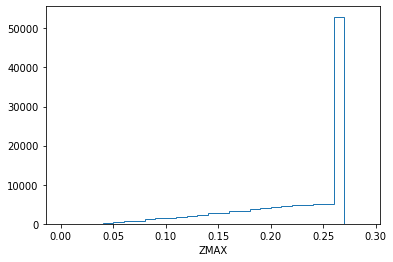

In [14]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [15]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, '$z_{\\rm max}$')

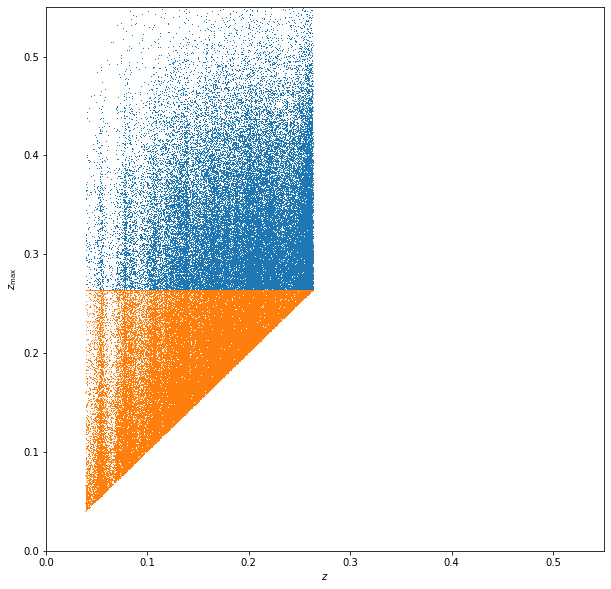

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

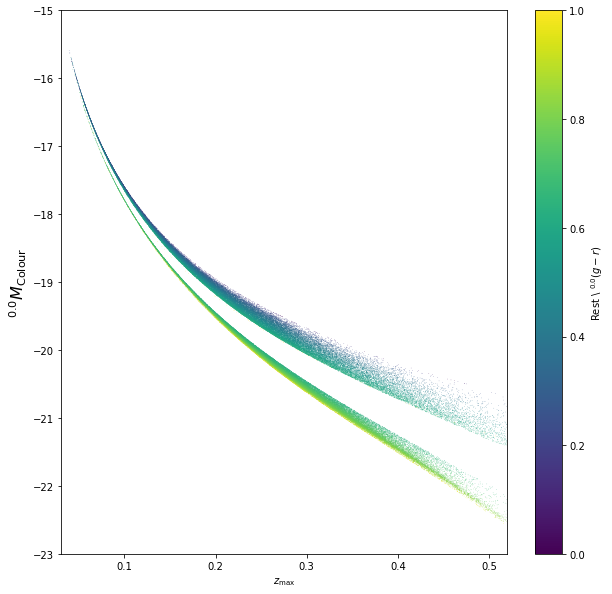

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

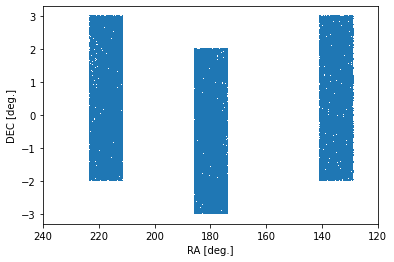

In [18]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [23]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,--
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-25.0,0.0,0.0,0.0,0.0,0.0,--
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,--
-24.6,0.0,0.0,0.0,0.0,0.0,--
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,--
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,--
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_85388/3573005910.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
/tmp/ipykernel_85388/3573005910.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)


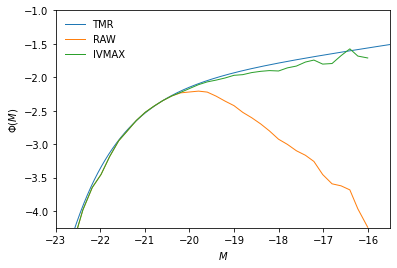

In [24]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR', lw=1.)

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '$V/V_{Max}$')

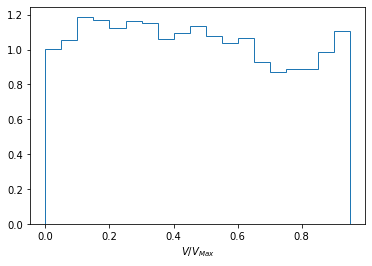

In [25]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

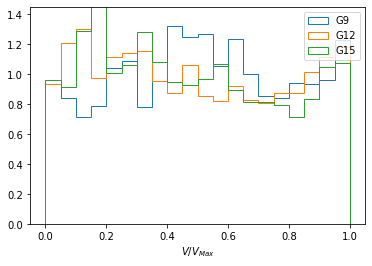

In [26]:
fields = ['G9', 'G12', 'G15']
for field in fields:
    field_vmax = gama_vmax[gama_vmax['FIELD'] == field]
    _ = pl.hist(field_vmax['VZ'] / field_vmax['VMAX'], bins=np.arange(0.0, 1.001, 0.05), histtype='step', density=True, label=field)

pl.legend()
pl.xlabel('$V/V_{Max}$')
pl.ylim(0, 1.45)
pl.show()


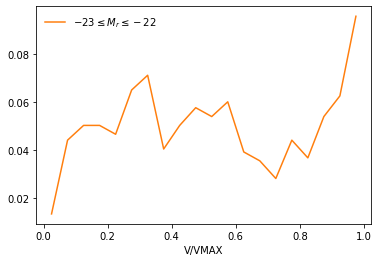

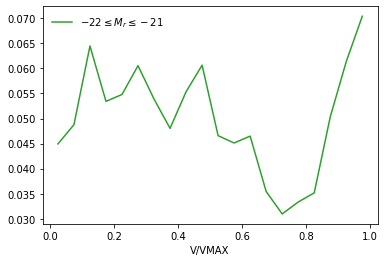

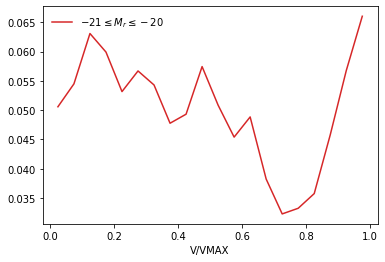

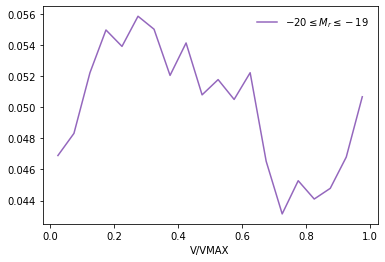

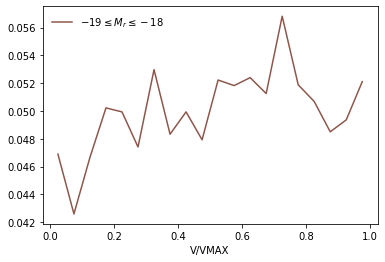

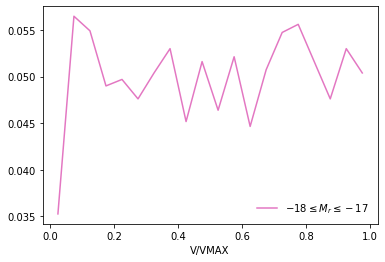

In [27]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [28]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,G12,-239.97727236461046,0.6935893874232879,-6.905119636685518,239.95593630894075,-2.7092935591663565,-7.1457227418616585,0.7871351,14.160493,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,-23.01412754054145,37.09571093614177,37.10954043562488,-0.11872379703855176,-0.14155580081515584,0.09800108132364935,0.12361948889850743,-22.930188228466623,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,G12,-314.6983622428863,-11.998751500068654,-11.395465440223349,314.7764615969768,9.35496746422525,-11.711092038957487,1.0383816,14.328211,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,-23.528504033267527,37.75259506392482,37.770842862010035,-0.09801980357535564,-0.0876437071781144,0.11870507478684547,0.17753158253554888,-23.400249615659654,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.9591792306916,39.76386339337955,G12,-713.9407537359408,-52.154217318169536,-33.75421886554996,714.3194415688174,46.155514435440104,-34.47047148430874,1.4456768,14.425353,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,-25.687145139771815,39.868426780897494,39.911202188331,-0.018670125386448577,0.29021962938141105,0.19805475297575253,0.5553949190950743,-25.292493687017117,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.9712644440074,37.212173568413235,G15,-202.7981329939006,-154.36433581903054,5.717037181843526,204.09321717251248,152.65545385094066,5.512399344915336,0.039456367,14.456577,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,-22.818599066841177,37.19130046586948,37.09185997317987,-0.11433057873334761,-0.13142393692472373,0.1023942996288535,0.13375135278893954,-22.774114665019606,5.343422,1.1327446851177603,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,

In [29]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.